In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

df_org = pd.read_csv("/home/jiwoo/notebook/Mall_Customers.csv")
df = df_org

In [2]:
df.shape

(200, 5)

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### Set a few columns only  3rd/4th columns only(numpy)
X = df.iloc[:, [0,1,2,3,4]].values

In [5]:
X = df.iloc[:, [0,1,2,3,4]].values
X

array([[1, 'Male', 19, 15, 39],
       [2, 'Male', 21, 15, 81],
       [3, 'Female', 20, 16, 6],
       [4, 'Female', 23, 16, 77],
       [5, 'Female', 31, 17, 40],
       [6, 'Female', 22, 17, 76],
       [7, 'Female', 35, 18, 6],
       [8, 'Female', 23, 18, 94],
       [9, 'Male', 64, 19, 3],
       [10, 'Female', 30, 19, 72],
       [11, 'Male', 67, 19, 14],
       [12, 'Female', 35, 19, 99],
       [13, 'Female', 58, 20, 15],
       [14, 'Female', 24, 20, 77],
       [15, 'Male', 37, 20, 13],
       [16, 'Male', 22, 20, 79],
       [17, 'Female', 35, 21, 35],
       [18, 'Male', 20, 21, 66],
       [19, 'Male', 52, 23, 29],
       [20, 'Female', 35, 23, 98],
       [21, 'Male', 35, 24, 35],
       [22, 'Male', 25, 24, 73],
       [23, 'Female', 46, 25, 5],
       [24, 'Male', 31, 25, 73],
       [25, 'Female', 54, 28, 14],
       [26, 'Male', 29, 28, 82],
       [27, 'Female', 45, 28, 32],
       [28, 'Male', 35, 28, 61],
       [29, 'Female', 40, 29, 31],
       [30, 'Female', 23

In [6]:
#onehotencoder -> cat features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
ohe_arr = ohe.fit_transform(df[['Gender']]).toarray()
ohe_labels = ohe.get_feature_names(['Gender'])
ohe_df = pd.DataFrame(ohe_arr, columns= ohe_labels)
ohe_df.head()

## or easier one. 
# df = pd.get_dummies(df.Gender)

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [19]:
from sklearn.preprocessing import OneHotEncoder
X = pd.concat([df_org,df],axis=1)
X = X.iloc[:, [2,3,4,5,6]].values

In [20]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


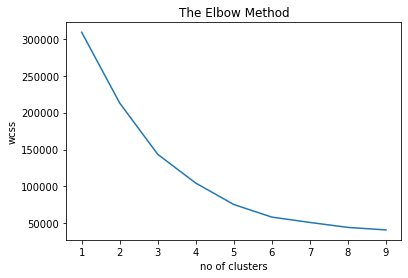

In [21]:
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [22]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)


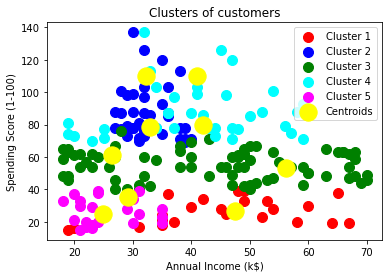

In [23]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:


###Model Interpretation 
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less